## Latent Dirichlet Allocation

**LDA (Latent Dirichlet Allocation)** is the most popular algorithm for **topic modeling**.

* It assumes each **document** is made up of multiple **topics**.
* Each **topic** is made up of a group of words that often appear together.
* LDA figures out the hidden structure: *which topics exist* and *how much of each topic is in every document*.

Example:

* Doc 1: 70% Healthcare + 30% Finance
* Doc 2: 80% Sports + 20% Healthcare

So, **LDA = a way to discover hidden topics in text using word patterns**.


In [4]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import gensim
import gensim.corpora as corpora

In [5]:
from google.colab import files
uploaded = files.upload()

Saving news_articles.csv to news_articles.csv


In [6]:
data = pd.read_csv("news_articles.csv")
data.head()

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...


In [11]:
# take just the content of the article, lowercase and remove punctuation
articles = data['content'].str.lower().apply(lambda x: re.sub(r"([^\w\s])", "", x))

# stop word removal
en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))

# tokenize
articles = articles.apply(lambda x: word_tokenize(x))

# stemming (done for speed as we have a lot of text)
ps = PorterStemmer()
articles = articles.apply(lambda tokens: [ps.stem(token) for token in tokens])

articles.head()

,content
0,"[dr, frank, sack, professor, nutrit, harvard, ..."
1,"[south, carolina, win, duke, surpris, fan, pos..."
2,"[want, get, brief, email, here, good, even, he..."
3,"[banjul, gambia, week, inaugur, anoth, countri..."
4,"[biggest, book, summer, isnt, blockbust, thril..."


In gensim, corpora is a module that helps you handle and manage text data before applying models like LDA.

A tool for creating dictionaries and bag-of-words representations that later feed into topic modeling or other NLP algorithms.

In [12]:
# create dictionary of all words
dictionary = corpora.Dictionary(articles)
print(dictionary)

Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


In [13]:
# vecotize using bag of words into a document term matrix
doc_term = [dictionary.doc2bow(text) for text in articles]

print(doc_term[1])

[[(9, 2), (23, 1), (35, 1), (62, 2), (76, 2), (86, 1), (87, 1), (90, 1), (93, 1), (110, 2), (120, 1), (122, 2), (133, 1), (169, 1), (174, 1), (185, 1), (204, 1), (209, 1), (217, 1), (245, 1), (247, 1), (249, 1), (250, 1), (252, 3), (257, 1), (261, 1), (263, 2), (271, 2), (275, 1), (291, 2), (292, 4), (295, 1), (298, 1), (322, 1), (325, 1), (345, 1), (346, 1), (351, 3), (354, 1), (363, 1), (369, 2), (385, 1), (387, 1), (398, 1), (405, 5), (422, 1), (440, 3), (485, 1), (492, 1), (535, 7), (539, 1), (544, 1), (546, 2), (575, 1), (585, 1), (594, 1), (614, 1), (628, 1), (631, 2), (644, 1), (646, 1), (664, 1), (670, 1), (674, 1), (677, 2), (680, 1), (681, 3), (688, 1), (693, 1), (694, 2), (695, 1), (696, 1), (697, 1), (698, 1), (699, 1), (700, 1), (701, 1), (702, 1), (703, 1), (704, 1), (705, 1), (706, 1), (707, 1), (708, 1), (709, 1), (710, 10), (711, 5), (712, 1), (713, 1), (714, 1), (715, 1), (716, 1), (717, 1), (718, 1), (719, 1), (720, 1), (721, 7), (722, 1), (723, 1), (724, 5), (725, 2

### LDA

In [14]:
# specify number of topics
num_topics = 2

In [15]:
# create LDA model
lda_model = gensim.models.LdaModel(corpus=doc_term,
                                   id2word=dictionary,
                                   num_topics=num_topics)

lda_model.print_topics(num_topics=num_topics, num_words=5)

[(0,
  '0.016*"mr" + 0.013*"said" + 0.005*"trump" + 0.005*"state" + 0.004*"one"'),
 (1,
  '0.018*"mr" + 0.016*"said" + 0.006*"trump" + 0.005*"would" + 0.004*"year"')]

# Latent Semantic Analysis

Latent Semantic Analysis (LSA) is a way for computers to understand the meaning of words and texts, not just the exact words used.

Here’s the idea:

* Words that appear in similar contexts usually have similar meanings.

* For example, the words "car" and "automobile" often appear near words like drive, road, engine.

* Even if a text never uses the word "car", but talks about engine, road, drive, LSA can figure out that it’s probably related to "car".

---
**SVD = Singular Value Decomposition**
It’s a math trick to break a big, messy table into cleaner, smaller pieces.

### Imagine this:

You have a giant **movie rating table**:

* Rows = users
* Columns = movies
* Numbers = how much a user liked a movie

The table is huge, noisy, and full of missing data.

$$
\text{Big Matrix} = U \times Σ \times V^T
$$

* **U** = captures patterns about **rows** (e.g., types of users)
* **Σ (Sigma)** = diagonal matrix with **importance weights** (which patterns matter most)
* **Vᵀ** = captures patterns about **columns** (e.g., types of movies)

---


# Latent Semantic Analysis

Latent Semantic Analysis (LSA) is a way for computers to understand the meaning of words and texts, not just the exact words used.

Here’s the idea:

* Words that appear in similar contexts usually have similar meanings.

* For example, the words "car" and "automobile" often appear near words like drive, road, engine.

* Even if a text never uses the word "car", but talks about engine, road, drive, LSA can figure out that it’s probably related to "car".

---
**SVD = Singular Value Decomposition**
It’s a math trick to break a big, messy table into cleaner, smaller pieces.

### Imagine this:

You have a giant **movie rating table**:

* Rows = users
* Columns = movies
* Numbers = how much a user liked a movie

The table is huge, noisy, and full of missing data.

$$
\text{Big Matrix} = U \times Σ \times V^T
$$

* **U** = captures patterns about **rows** (e.g., types of users)
* **Σ (Sigma)** = diagonal matrix with **importance weights** (which patterns matter most)
* **Vᵀ** = captures patterns about **columns** (e.g., types of movies)

---


In [16]:
import gensim
from gensim.models import LsiModel

In [26]:
lsa_model = LsiModel(corpus=doc_term, id2word=dictionary, num_topics=num_topics)
print(lsa_model.print_topics(num_topics=num_topics, num_words=5))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"')]


### Determine Number of Topics

In [21]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [27]:
# generate coherence scores to determine an optimum number of topics
coherence_values = []
model_list = []

min_topics = 2
max_topics = 11

for num_topics_i in range(min_topics, max_topics+1):
    model = LsiModel(doc_term, num_topics=num_topics_i, id2word = dictionary, random_seed=0)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=articles, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

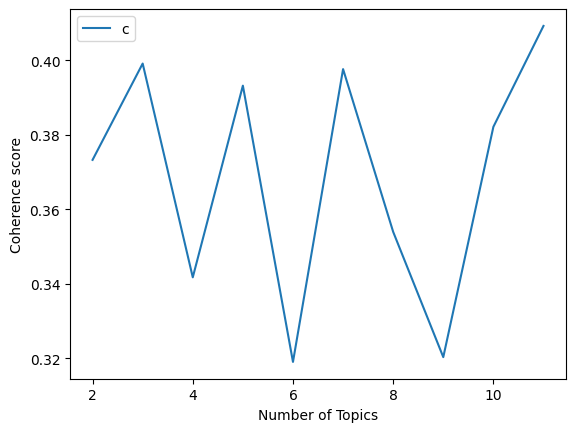

In [28]:
plt.plot(range(min_topics, max_topics+1), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()